## Consumir dados API- Company Overview - www.alphavantage.co

### Capturar dados Básicos

In [1]:
!pip install python-dotenv
!pip install requests

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

# Acessando as variáveis:
api_key = os.getenv('API_KEY')
base_url = os.getenv('BASE_URL_OVERVIEW')

In [3]:
import requests
import json

# Função para obter o resumo de uma empresa
def get_company_overview(symbol):
    url = f'{base_url}&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if symbol in data['Symbol']:
            # Extract specific data points of interest
            company_name = data['Name']
            description = data['Description']
            sector = data['Sector']
            industry = data['Industry']
            market_cap = float(data['MarketCapitalization'])  # Assuming value is a string, convert to float if necessary
            # ... (extract other desired data points)

            # Print or return the extracted information
            print(f"Company Name: {company_name}")
            print(f"Description: {description}")
            print(f"Sector: {sector}")
            print(f"Industry: {industry}")
            print(f"Market Capitalization: {market_cap:,.2f}")  # Format market cap with commas and 2 decimal places
            # ... (print other extracted data points)

            return data  # Alternatively, return the entire overview dictionary
        else:
            print(f"Erro: 'Overview' não encontrado para {symbol}")
    else:
        print(f"Erro na requisição: {response.status_code}")
        return None
    
# Lista de símbolos das empresas
symbols = ['GOOGL', 'AAPL', 'NVDA']

# Loop para obter o resumo de cada empresa
for symbol in symbols:
    overview = get_company_overview(symbol)
    print(f"Resumo da {symbol}:")
    print(json.dumps(overview, indent=4))

Company Name: Alphabet Inc Class A
Description: Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a restructuring of Google on October 2, 2015, and became the parent company of Google and several former Google subsidiaries. The two co-founders of Google remained as controlling shareholders, board members, and employees at Alphabet. Alphabet is the world's fourth-largest technology company by revenue and one of the world's most valuable companies.
Sector: TECHNOLOGY
Industry: SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING, ETC.
Market Capitalization: 2,061,374,587,000.00
Resumo da GOOGL:
{
    "Symbol": "GOOGL",
    "AssetType": "Common Stock",
    "Name": "Alphabet Inc Class A",
    "Description": "Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a restructuring of Google on October 2, 2015, and became the parent company of Google and severa

## Analise Técnica

### Preparar dados histórico dos preços das ações

In [4]:
!pip install yfinance

In [5]:
import yfinance as yf
import pandas as pd

In [6]:
# Obtendo dados históricos da Apple
#for symbol in symbols:
def obter_preco_acoes(symbol, start, end):
    return yf.download(symbol, start, end) 


In [7]:
start = input('Data inicio:')
end = input('Data fin: ')

# Criar um DataFrame para armazenar os dados
data = pd.DataFrame()

In [8]:
for symbol in symbols:
    df = obter_preco_acoes(symbol, start, end)
    df['symbol'] = symbol
    data = pd.concat([data, df])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Informações Básicas

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2024-07-01,183.029999,183.880005,181.300003,182.990005,182.990005,16006100,GOOGL
2024-07-02,182.050003,185.570007,181.559998,185.240005,185.240005,17372500,GOOGL
2024-07-03,184.850006,186.089996,184.000000,185.820007,185.820007,10242100,GOOGL
2024-07-05,185.860001,190.860001,185.800003,190.600006,190.600006,20967500,GOOGL
2024-07-08,189.899994,190.169998,187.779999,189.029999,189.029999,21035900,GOOGL


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2024-07-01 to 2024-08-16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       102 non-null    float64
 1   High       102 non-null    float64
 2   Low        102 non-null    float64
 3   Close      102 non-null    float64
 4   Adj Close  102 non-null    float64
 5   Volume     102 non-null    int64  
 6   symbol     102 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 6.4+ KB


In [11]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,171.249608,173.750686,168.729412,171.302255,171.229313,1.356449e+08
std,43.549849,43.417904,43.986282,43.791523,43.706087,1.477458e+08
min,92.059998,103.410004,90.690002,98.910004,98.910004,1.024210e+07
25%,124.447500,128.422501,122.719999,125.962502,125.962502,2.972865e+07
50%,173.420006,175.220001,170.915001,172.084999,172.084999,5.221885e+07
75%,216.757504,219.504997,215.475006,217.852505,217.663506,2.455334e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,5.528424e+08


### Candlestick

In [12]:
!pip install mplfinance
!pip install seaborn

In [13]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

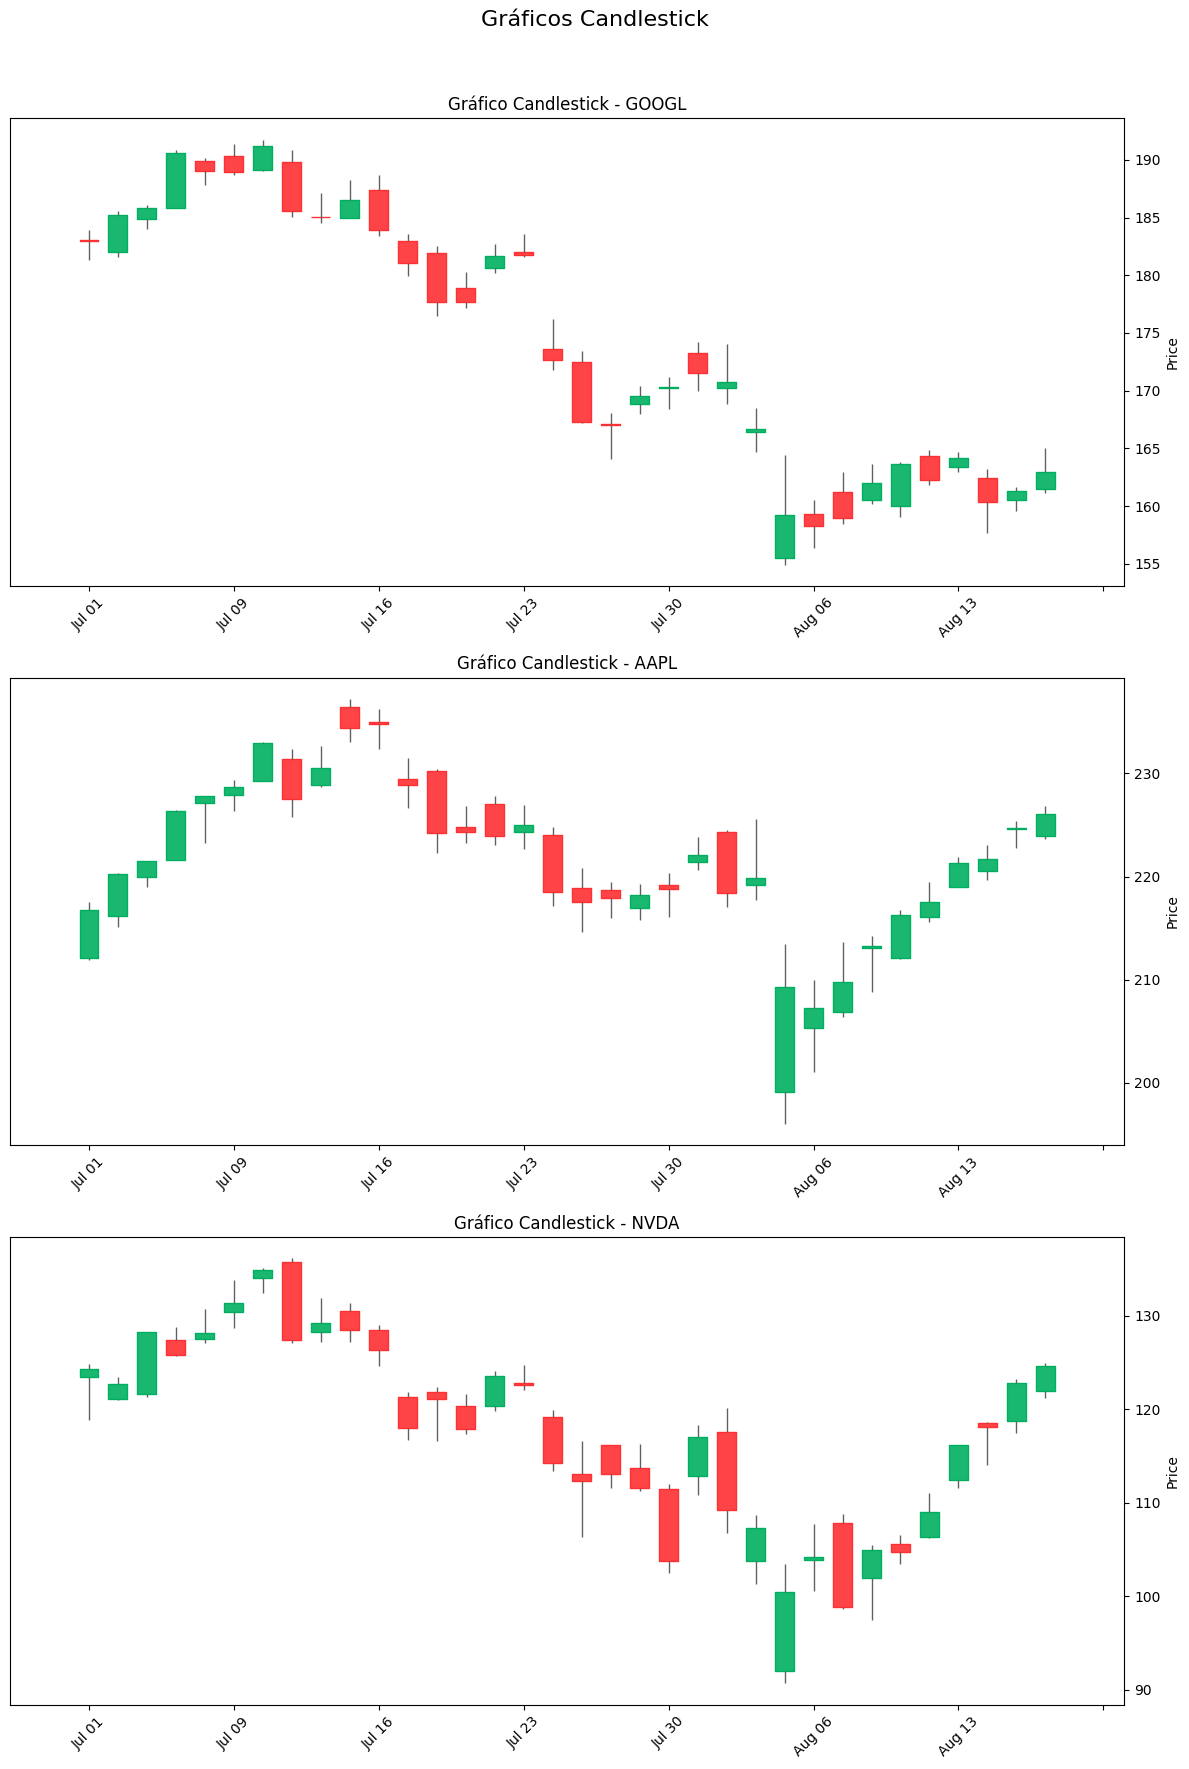

In [14]:

# Criar uma figura com múltiplos subplots
fig, axes = plt.subplots(nrows=len(symbols), ncols=1, figsize=(12, 6 * len(symbols)))

# Ajusta o layout para evitar sobreposição
fig.tight_layout(pad=4.0)

# Se houver apenas um gráfico, axes será um único eixo, então transforme em uma lista
if len(symbols) == 1:
    axes = [axes]

# Configura os gráficos de candlestick para cada símbolo
for i, symbol in enumerate(symbols):
    # Verificar se o símbolo existe no DataFrame
    if symbol in data['symbol'].values:
        group = data[data['symbol'] == symbol]
        ax = axes[i]

        # Plota o gráfico de candlestick
        mpf.plot(group[['Open', 'High', 'Low', 'Close']], type='candle', style='yahoo', ax=ax)

        # Define o título do gráfico
        ax.set_title(f'Gráfico Candlestick - {symbol}', fontsize=12)
    else:
        print(f"O símbolo '{symbol}' não foi encontrado no DataFrame.")

# Adiciona um título geral para a figura
fig.suptitle('Gráficos Candlestick', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Exibir os gráficos
plt.show()

### Indicadores Técnicos

#### Calcular Médias Moveis Simples - MMS

In [15]:
def calculate_sma(data, column, window_size):
  """
  Calculates the Simple Moving Average (SMA) for a given column and window size.

  Args:
    data: Pandas DataFrame containing the data.
    column: The name of the column to calculate the SMA for.
    window_size: The number of periods for the SMA calculation.

  Returns:
    A Pandas Series containing the SMA values.
  """

  sma = data[column].rolling(window=window_size).mean()
  return sma

# Exemplo de uso:
data['MMS_15'] = calculate_sma(data, 'Close', 15)

#Preencher DataFrame com próximo valor válido
data['MMS_15'] = calculate_sma(data, 'Close', 15).bfill()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2024-07-01 to 2024-08-16
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       102 non-null    float64
 1   High       102 non-null    float64
 2   Low        102 non-null    float64
 3   Close      102 non-null    float64
 4   Adj Close  102 non-null    float64
 5   Volume     102 non-null    int64  
 6   symbol     102 non-null    object 
 7   MMS_15     102 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.2+ KB


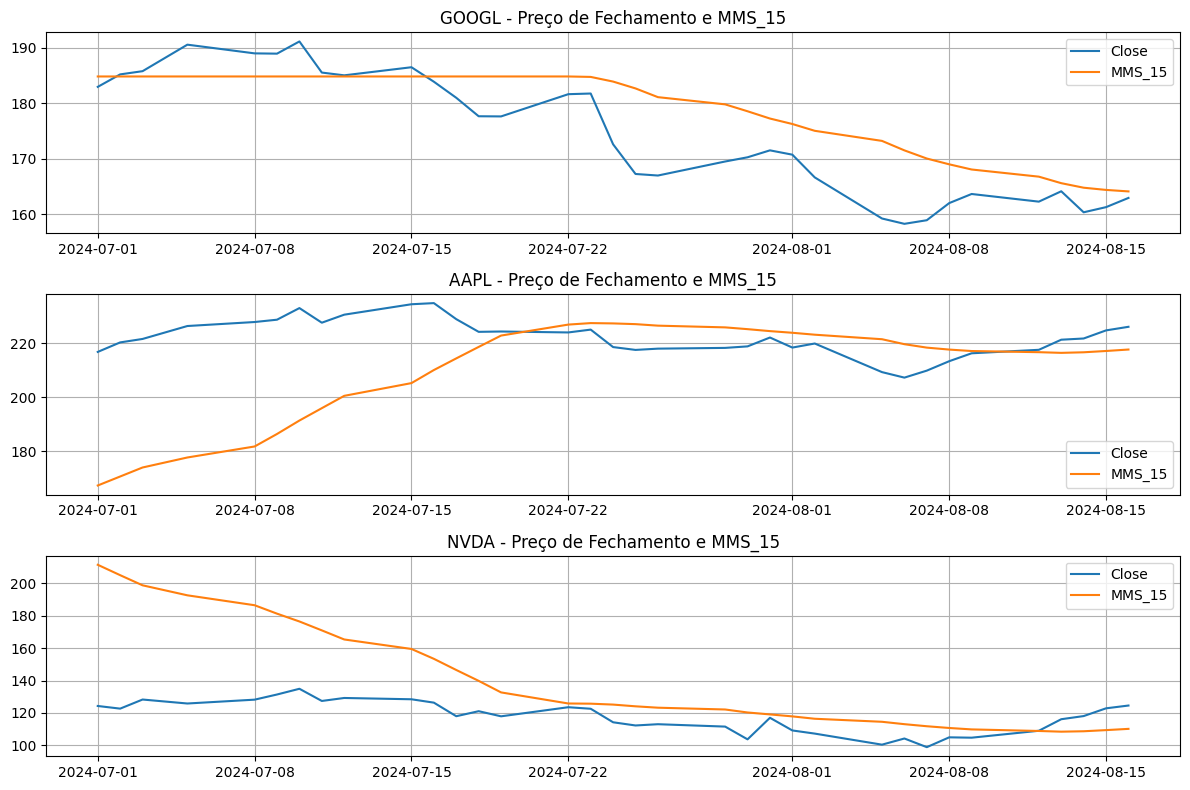

In [17]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Filtrando o DataFrame para as ações desejadas
filtered_data = data[data['symbol'].isin(symbols)]

# Criando subplots para visualizar múltiplos gráficos em uma mesma figura
fig, axes = plt.subplots(nrows=len(symbols), figsize=(12, 8))

# Iterando sobre as ações e criando gráficos
for i, symbol in enumerate(symbols):
    symbol_data = filtered_data[filtered_data['symbol'] == symbol]
    axes[i].plot(symbol_data.index, symbol_data['Close'], label='Close')
    axes[i].plot(symbol_data.index, symbol_data['MMS_15'], label='MMS_15')
    axes[i].set_title(f"{symbol} - Preço de Fechamento e MMS_15")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### MACD para gerar sinais de compra e venda

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculando o MACD
def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    """
    Calcula o MACD, a linha de sinal e o histograma.

    Args:
        data: DataFrame com os dados.
        short_period: Período da média móvel curta (default: 12).
        long_period: Período da média móvel longa (default: 26).
        signal_period: Período da média móvel do sinal (default: 9).

    Returns:
        Um DataFrame com as colunas MACD, signal e hist.
    """

    short_ema = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    hist = macd - signal
    return pd.DataFrame({'macd': macd, 'signal': signal, 'hist': hist})

# Adicionando o MACD ao DataFrame
macd_data = calculate_macd(data)
data = pd.concat([data, macd_data], axis=1)

In [19]:
import numpy as np

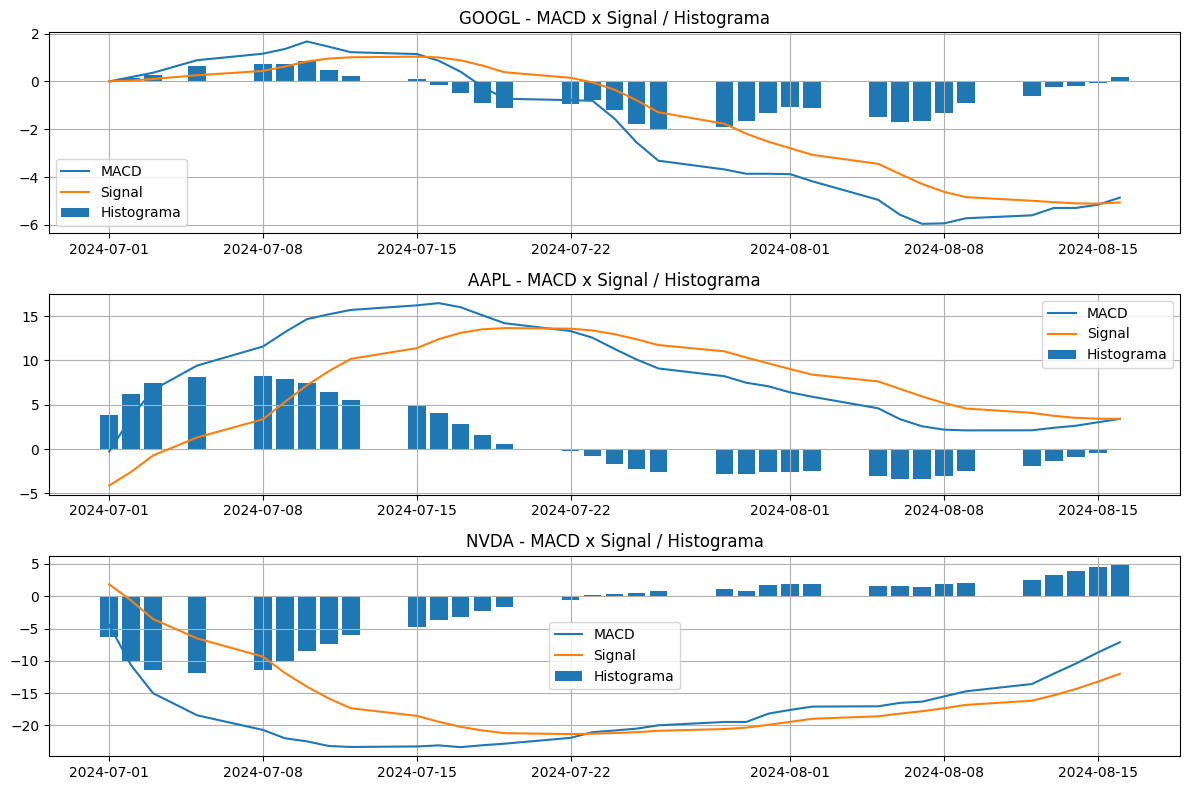

In [20]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Verificando e preenchendo valores NaN (se necessário)
data = data.ffill()  # Preenche com o valor anterior

# Criando subplots
fig, axes = plt.subplots(nrows=len(symbols), figsize=(12, 8))

for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol]

    # Plotando o preço de fechamento, MMS_15 e MACD
    #axes[i].plot(symbol_data.index, symbol_data['Close'], label='Close')
    #axes[i].plot(symbol_data.index, symbol_data['MMS_15'], label='MMS_15')
    axes[i].plot(symbol_data.index, symbol_data['macd'], label='MACD')
    axes[i].plot(symbol_data.index, symbol_data['signal'], label='Signal')
    axes[i].bar(symbol_data.index, symbol_data['hist'], label='Histograma')

    # Adicionando título, legenda e grid
    axes[i].set_title(f"{symbol} - MACD x Signal / Histograma")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### RSI (Relative Strength Index)

In [21]:
#import pandas as pd
#import numpy as np

def calculate_rsi(data, period=14):
    """
    Calcula o RSI para um DataFrame de dados.

    Args:
        data: DataFrame com a coluna 'Close'.
        period: Período para o cálculo do RSI (default: 14).

    Returns:
        Um DataFrame com a coluna 'RSI'.
    """

    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Aplicando a função ao DataFrame
data['RSI'] = calculate_rsi(data)

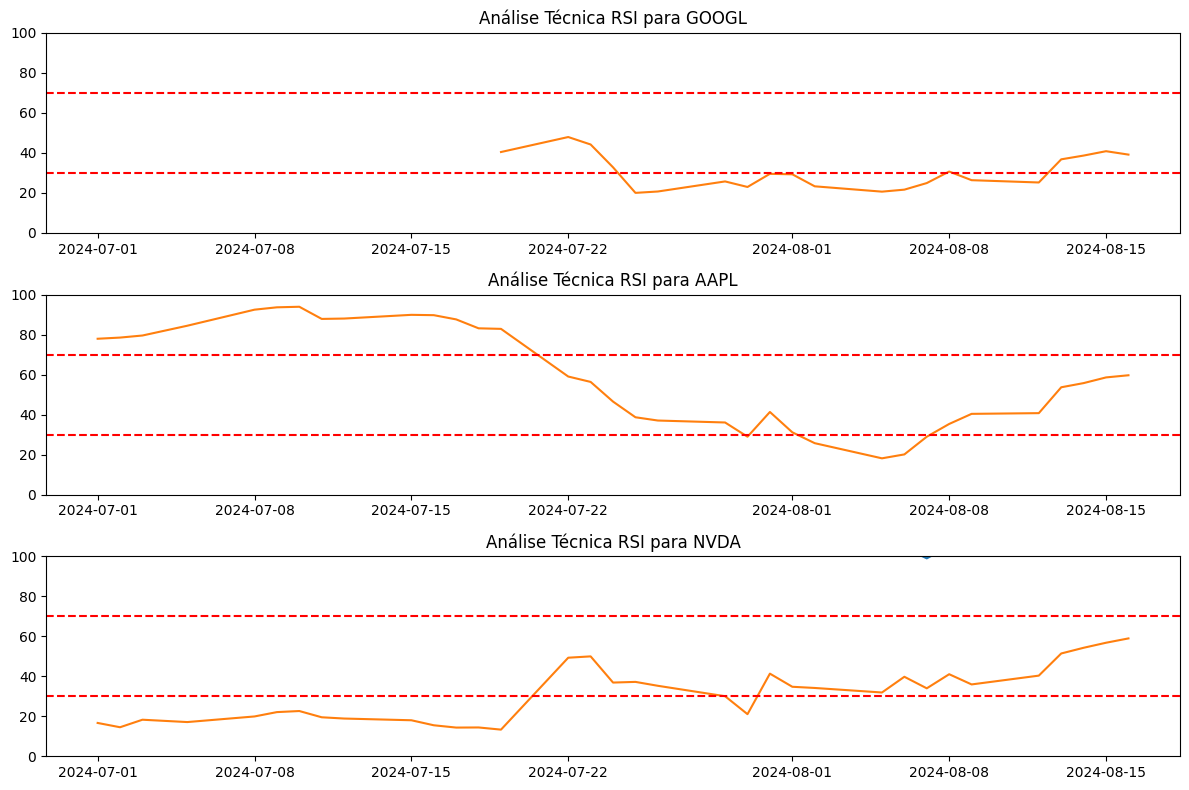

In [22]:
# Verificando e preenchendo valores NaN (se necessário)
data['RSI'] = data['RSI'].ffill()  # Preenche com o valor anterior

# Criando subplots
fig, axes = plt.subplots(nrows=len(symbols), figsize=(12, 8))

for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol]

    # Plotando o preço de fechamento, MMS_15, MACD e RSI
    axes[i].plot(symbol_data.index, symbol_data['Close'], label='Close')
    # ... (outros plots)
    axes[i].plot(symbol_data.index, symbol_data['RSI'], label='RSI')

    # Adicionando níveis de sobrecompra e sobrevenda
    axes[i].axhline(70, color='r', linestyle='--')
    axes[i].axhline(30, color='r', linestyle='--')

    # Adicionando título ao gráfico
    axes[i].set_title(f"Análise Técnica RSI para {symbol}")

    # Ajustando os limites do eixo y (opcional)
    axes[i].set_ylim(0, 100)

    
    # ... (resto do código para personalização)

plt.tight_layout()
plt.show()

#### Criando Estratégias de Negociação Baseadas em RSI e MACD

In [23]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,symbol,MMS_15,macd,signal,hist,RSI
Date,,,,,,,,,,,,
2024-07-01,183.029999,183.880005,181.300003,182.990005,182.990005,16006100,GOOGL,184.864669,0.000000,0.000000,0.000000,NaN
2024-07-02,182.050003,185.570007,181.559998,185.240005,185.240005,17372500,GOOGL,184.864669,0.179487,0.035897,0.143590,NaN
2024-07-03,184.850006,186.089996,184.000000,185.820007,185.820007,10242100,GOOGL,184.864669,0.364334,0.101585,0.262749,NaN
2024-07-05,185.860001,190.860001,185.800003,190.600006,190.600006,20967500,GOOGL,184.864669,0.886315,0.258531,0.627784,NaN
2024-07-08,189.899994,190.169998,187.779999,189.029999,189.029999,21035900,GOOGL,184.864669,1.159931,0.438811,0.721120,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2024-07-01 to 2024-08-16
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       102 non-null    float64
 1   High       102 non-null    float64
 2   Low        102 non-null    float64
 3   Close      102 non-null    float64
 4   Adj Close  102 non-null    float64
 5   Volume     102 non-null    int64  
 6   symbol     102 non-null    object 
 7   MMS_15     102 non-null    float64
 8   macd       102 non-null    float64
 9   signal     102 non-null    float64
 10  hist       102 non-null    float64
 11  RSI        89 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 10.4+ KB
